In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Linear regression with one variables
path = 'ex1data1.txt'
data = pd.read_csv(path, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


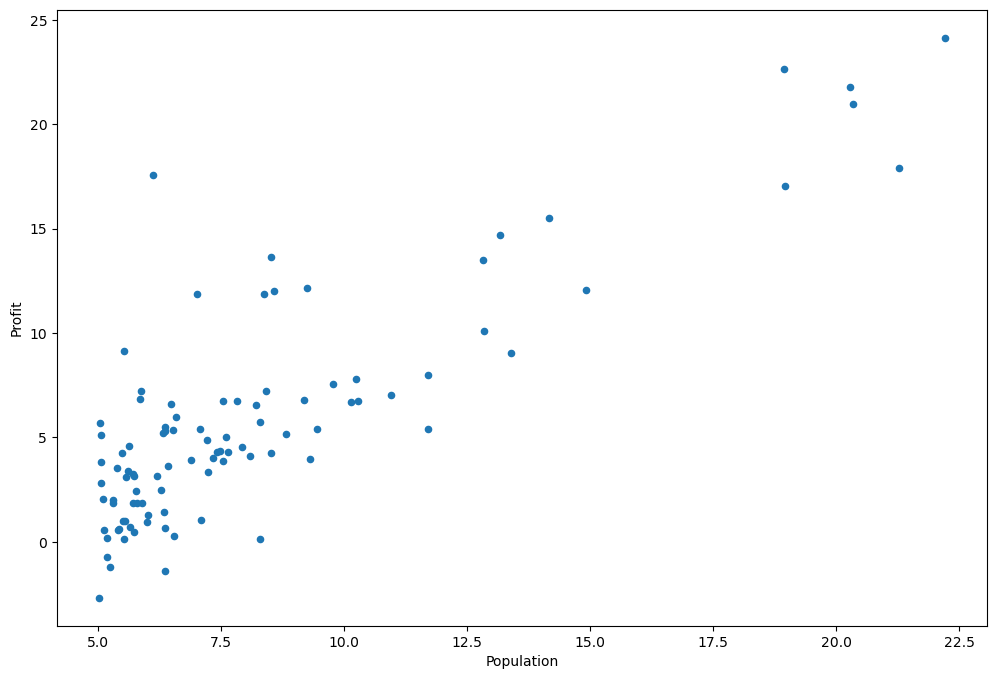

In [4]:
data.plot.scatter(x = 'Population', y = 'Profit', figsize = (12, 8))
plt.show()

In [5]:
data.insert(0, 'x0', 1, allow_duplicates = True)
data.head()

,x0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
def computeCost(theta, X, y):
    inner = np.power(X * theta.T - y, 2)
    cost = np.sum(inner) /(2 * len(X))
    return cost

In [7]:
cols = data.shape[1]
X = data.iloc[:, 0 : cols - 1] # X是所有行，去掉最后一列；索引值，左闭右开
y = data.iloc[:, cols -1:cols]

In [8]:
X.head()

,x0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0,0])

In [11]:
theta
# temp1 = np.matrix([0,0])
# temp2 = np.matrix(temp1)
# temp2[0,1] = 3
# temp2

matrix([[0, 0]])

In [12]:
computeCost(theta, X, y)

32.072733877455676

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    parameters_num = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        temp = np.matrix(np.zeros(theta.shape))
        error = X * theta.T - y 
        
        for j in range(parameters_num):
            temp[0, j] = theta[0, j] - alpha * np.sum(np.multiply(error, X[:, j]))/len(X)
        
        theta = temp
        cost[i] = computeCost(theta, X, y)
    
    return theta, cost

In [14]:
alpha = 0.01
iters = 1000

In [15]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [16]:
computeCost(g, X, y)

4.515955503078914

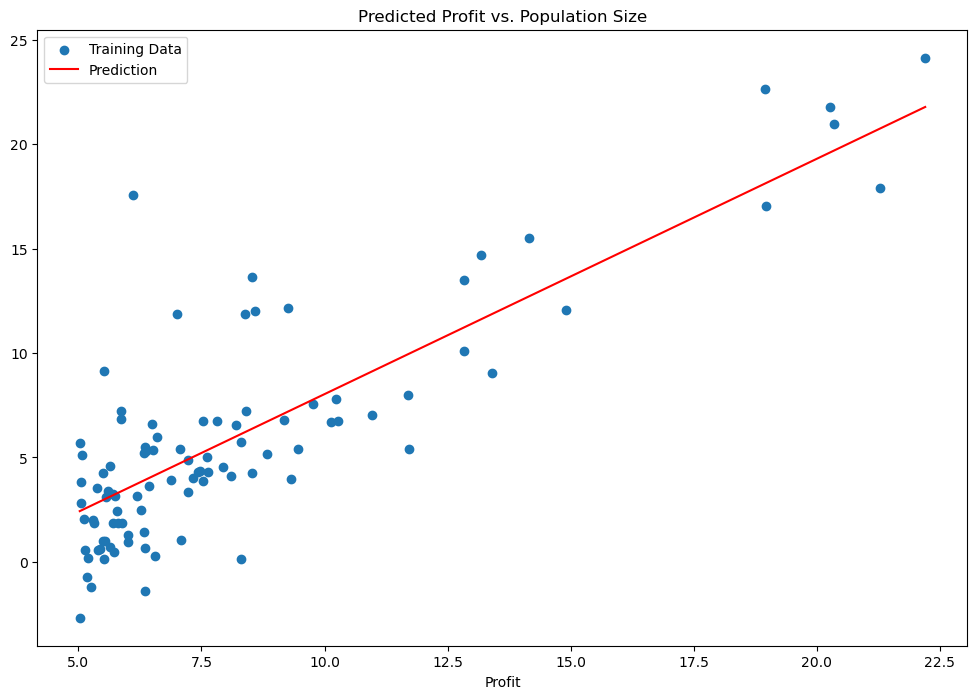

In [17]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
h = g[0, 0] + g[0, 1] * x

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(data.Population, data.Profit, label = 'Training Data')# 所给数据的散点图
ax.plot(x, h, 'r', label = 'Prediction') # 最终确认的拟合直线
ax.legend()#图例，就是左上角那个说明块
ax.set_xlabel('Population')
ax.set_xlabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

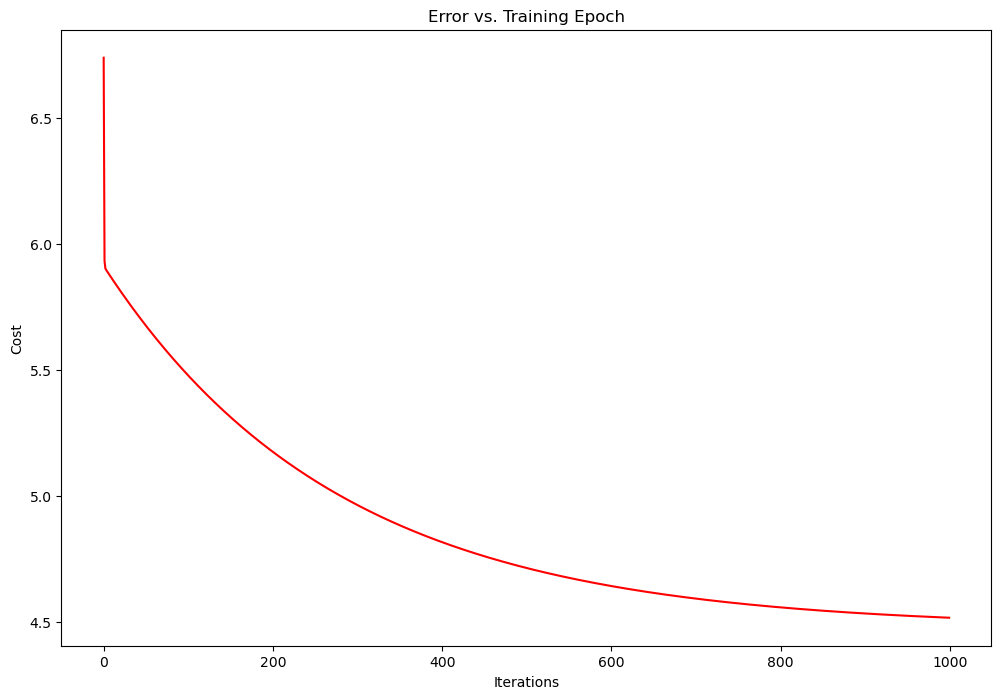

In [18]:
# plot the cost function j of θ as gradient descent runs to see if working correctly
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [19]:
# Linear regression with multiple variables
path = 'ex1data2.txt'
data2 = pd.read_csv(path, names=['Size(feet^2)', 'Number of bedrooms', 'Price'])
data2.head()

,Size(feet^2),Number of bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
# Feature Normalization
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size(feet^2),Number of bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [21]:
# 重复第一部分的预处理，并对新数据集运行gradient descent
data2.insert(0, "x0", 1)
data2.head()

,x0,Size(feet^2),Number of bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [22]:
cols = data2.shape[1]
X2 = data2.iloc[:, 0 : cols - 1]
y2 = data2.iloc[:, cols - 1 : cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.zeros(cols - 1))

theta2

matrix([[0., 0., 0.]])

In [23]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

computeCost(g2, X2, y2)

0.13070336960771892

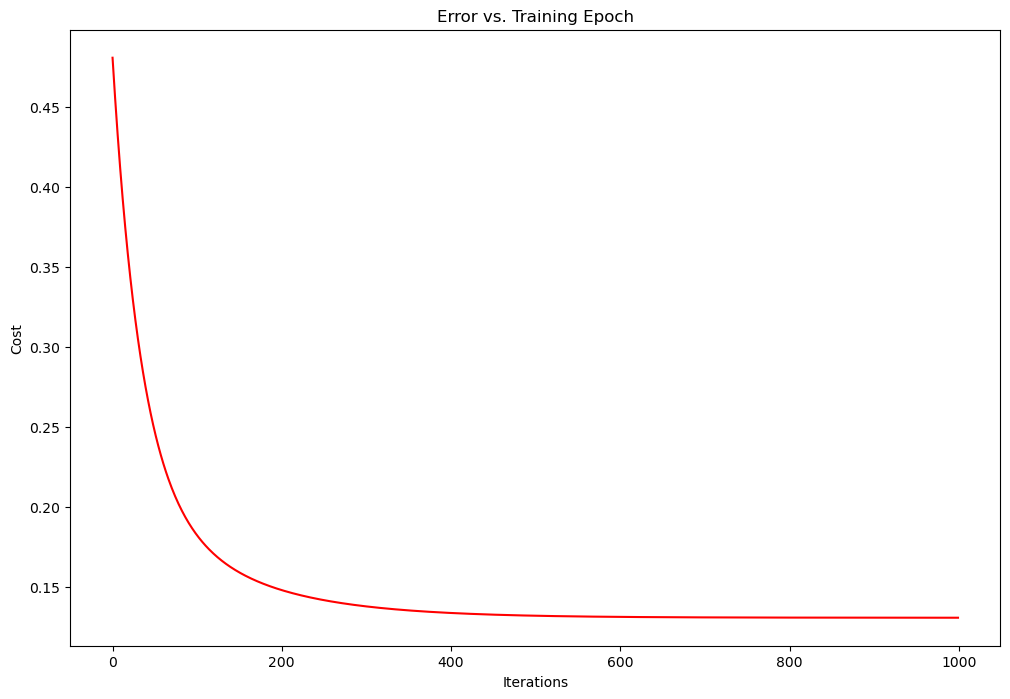

In [24]:
# plot the cost function j of θ as gradient descent runs to see if working correctly
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [25]:
# 正规方程
def normalEquation(X, y):
    theta = np.linalg.pinv(X.T * X) * X.T * y
    return theta

In [26]:
nor_theta2 = normalEquation(X, y)
nor_theta2

matrix([[-3.89578088],
        [ 1.19303364]])